- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
- MEDV: median value of owner-occupied homes

In [1]:
import keras
from keras import backend
from keras.layers import Input, Dense, Dropout

import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import time

from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit, train_test_split


In [2]:
df = pd.read_csv('housing-cleaned.csv')

In [3]:
def r2_score(y_true, y_pred):
    sst = backend.square(y_true - backend.mean(y_true)) #sst = sum squared of totals
    ssr = backend.square(y_true - y_pred) #ssr = sum squared of residuals
    return 1 - (backend.sum(ssr)/backend.sum(sst))

y_true - backend.mean(y_true) -> centra los valores en 0 ( voy a tener valores + y -)
y_true - y_pred -> son los residuals, informa una medida de error de nuestro modelo con respecto a los valores reales

si r2_score == 0 -> backend.sum(ssr)/backend.sum(sst) == 1 -> sst == ssr -> mean(y_true) == y_pred
esto significa que nuestro modelo esta prediciendo el valor medio de los datos, 
no es ni bueno ni malo ( en realidad se espera algo mucho mejor )

si r2 > 0 -> backend.sum(sst) > backend.sum(ssr) -> los residuos son menores que el valor promedio de los datos 

si r2 < 0 -> backend.sum(sst) < backend.sum(ssr) -> los residuos son mayores que el valor promedio de los datos 

r2 =< 1 siempre por definicion. (backend.sum(ssr)/backend.sum(sst)) es una division de cuadrados, nunca puede dar numero negativo.

#https://en.wikipedia.org/wiki/Coefficient_of_determination
#https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative#12991

In [25]:
#TODO: APLICAR DROPOUT / BATCH NORM ?? PROBAR OTRA FC DE ACTIVACION

def build_model(dropout_value = 0.3, n_layers=4, activation_fc='selu'):
    
    #input layer
    model = keras.Sequential([
        keras.layers.Dense(64, activation=activation_fc, input_shape=[len(X_train.keys())]),
        Dropout(dropout_value)
    ])

    #hidden layers
    for _ in range(n_layers):
        model.add(keras.layers.Dense(128, activation=activation_fc))
        model.add(Dropout(dropout_value))
        
    #output layer
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer='rmsprop',
                  loss='mse',   
                  metrics=['mae', r2_score])
    return model

def fit_model(X_train, X_test, model):
    
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    EPOCHS = 1000

    model.fit(
      X_train, y_train,
      epochs=EPOCHS, batch_size=128, validation_split = 0.2, verbose=0)
    
    return X_train, X_test, model

def r2_score_(y_true, y_pred):
    sst = (y_test - y_test.mean()) ** 2 #sst = sum squared of totals
    ssr = (y_test - y_pred.mean()) ** 2 #ssr = sum squared of residuals
    return 1 - (ssr.sum()/sst.sum())

def predict_data(model, X_test, y_test):
    score = model.predict(X_test)
    print("explained_variance_score: {:,.5f}".format(explained_variance_score(y_test, score)))
    print("r2_score: {}".format(r2_score_(y_test, score)))
    return model

In [26]:
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = build_model()
X_train, X_test, model = fit_model(X_train, X_test, model)

model = predict_data(model, X_test, y_test)


explained_variance_score: 0.83109
r2_score: -0.003431158539911605


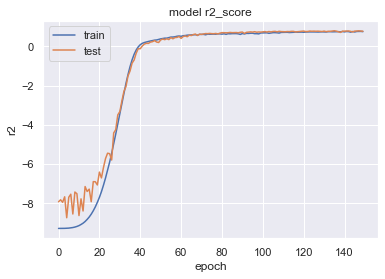

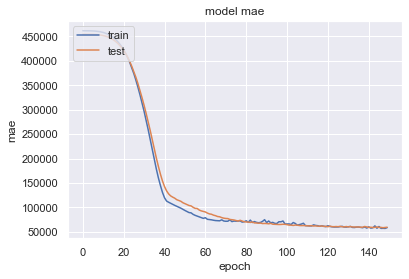

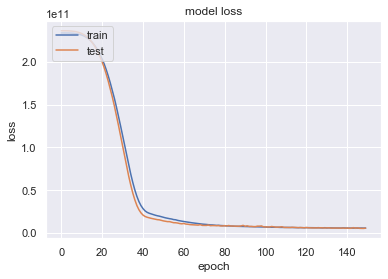

In [196]:
history = model.history

# summarize history for r2
plt.plot(history.history['val_r2_score'])
plt.plot(history.history['r2_score'])
plt.title('model r2_score')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for mae
plt.plot(history.history['val_mae'])
plt.plot(history.history['mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

#### Loss curves just look good.

#### Anyways, forest regressor model was able to achieve better metrics, so we won't continue with NN predicition.